# Pichu or Pikachu?

In [62]:
def load_data(TRAIN_DATA, TEST_DATA):

#################################################################################### Training data

    with open(TRAIN_DATA, "r") as file:
        TRAINING_ROWS = [training_row.strip("\n").split(", ") for training_row in file.readlines()[1:]]


    TRAINING_POINTS = []
    for training_row in TRAINING_ROWS:
        FORMATED_TRAINING_ROWS = [int(value) if value.isdigit() else float(value) for value in training_row ]
        TRAINING_POINTS.append(FORMATED_TRAINING_ROWS)


    TRAINING_WIDTH = [width[0] for width in TRAINING_POINTS]
    TRAINING_HEIGHT = [height[1] for height in TRAINING_POINTS]
    TRAINING_LABEL = [label[2] for label in TRAINING_POINTS]

    TRAINING_COLUMNS = {'Width':TRAINING_WIDTH, 'Height':TRAINING_HEIGHT, 'Label':TRAINING_LABEL}



#################################################################################### Test data



    with open(TEST_DATA, "r") as file:
        TEST_ROWS = [test_row[:-2].split(" (") for test_row in file.readlines()[1:]]

    TEST_ROWS = [test_row[1].split(", ") for test_row in TEST_ROWS]

    TEST_WIDTH = [float(test_width[0]) for test_width in TEST_ROWS]
    TEST_HEIGHT = [float(test_height[1]) for test_height in TEST_ROWS]


    TEST_POINTS = []
    for test_row in TEST_ROWS:
        FORMATED_TEST_ROWS = [ [float(value) for value in test_row ] ]
        TEST_POINTS.append(FORMATED_TEST_ROWS)



    return TRAINING_COLUMNS, [TEST_WIDTH, TEST_HEIGHT]


In [63]:


def graph(TRAINING_COLUMNS):

    sns.relplot(data=TRAINING_COLUMNS, x='Width', y='Height', hue='Label', hue_order=[0,1])
    plt.show()

#https://stackoverflow.com/questions/14885895/color-a-scatter-plot-by-column-values


In [64]:
def classifying(TRAINING_COLUMNS, TEST_WIDTH, TEST_HEIGHT):


    ALL_NEIGHBOURS = []
    for p1, p2 in zip(TEST_WIDTH, TEST_HEIGHT): # distance calculated with Euclidean formula sqrt( (p1-q1)^2 + (p2-q2)^2... ) & stored with label & index in tuple

        distance_list = [ (( (p1-qx)**2  + (p2-qy)**2 )**(1/2), TRAINING_COLUMNS['Label'][idx], idx) for idx, (qx, qy) in enumerate(zip(TRAINING_COLUMNS['Width'], TRAINING_COLUMNS['Height'])) ]
        ALL_NEIGHBOURS.append(distance_list)


    CLOSEST_NEIGHBOURS = [] #10 closest neighbours stored sorted
    for distances in ALL_NEIGHBOURS:
        distances.sort()
        CLOSEST_NEIGHBOURS.append(distances[:10])


 ####################################################################################


    PREDICTED_LABEL = []

    for idx, neighbours in enumerate(CLOSEST_NEIGHBOURS):

        PIKACHU_VOTES, DISTANCE_TO_PIKACHU, DISTANCE_TO_PICHU = 0,0,0
        PIKACHU = f"Sample with (width, height) ({str(TEST_WIDTH[idx])}, {str(TEST_HEIGHT[idx])}) classified as Pikachu"
        PICHU = f"Sample with (width, height) ({str(TEST_WIDTH[idx])}, {str(TEST_HEIGHT[idx])}) classified as Pichu"



        if len(CLOSEST_NEIGHBOURS) == 4: # for testpoint.txt
 
            for neighbor in neighbours[:1]:

                if neighbor[1] == 1:
                    PIKACHU_VOTES += 1
            
                        
            if PIKACHU_VOTES > 0:
                print(PIKACHU)

            else:
                print(PICHU)


        else: # for shuffled_testpoints.txt

            for neighbor in neighbours:


                if neighbor[1] == 1:
                    PIKACHU_VOTES += 1
                    DISTANCE_TO_PIKACHU += neighbor[0]

                else:
                    DISTANCE_TO_PICHU += neighbor[0]


            if PIKACHU_VOTES > 5:
                PREDICTED_LABEL.append(1)

            elif PIKACHU_VOTES < 5:
                PREDICTED_LABEL.append(0)

            elif PIKACHU_VOTES == 5:

                if DISTANCE_TO_PICHU > DISTANCE_TO_PIKACHU:
                    PREDICTED_LABEL.append(1)

                else:
                    PREDICTED_LABEL.append(0)


    return PREDICTED_LABEL
 


In [65]:
def add_test_points():


    NEW_WIDTH = input("Enter width: ")
    NEW_HEIGHT = input("Enter height: ")


    with open("testpoints.txt") as file:
        ROW_INDEX = len(file.readlines())


    NEW_TEST_POINT = f"{ROW_INDEX}. ({NEW_WIDTH}, {NEW_HEIGHT})" + '\n'

    with open("testpoints.txt", "a") as file:
        file.write(NEW_TEST_POINT)



In [66]:
def shuffle_data():


    with open("datapoints.txt", "r") as file:
        DATAROWS = [row.strip("\n").split(", ") for row in file.readlines()[1:]]

    DATAPOINTS = []
    for datarow in DATAROWS:
        FORMATED_ROW = [int(values) if values.isdigit() else float(values) for values in datarow ]
        DATAPOINTS.append(FORMATED_ROW)

    random.shuffle(DATAPOINTS)

    SHUFFLED_TEST_SET, SHUfFLED_TRAIN_SET, SHUFFLED_LABELS = [], [], []
    PIK, PICH = 0, 0


    for point in DATAPOINTS:
        if point[-1] == 1 and PIK < 25:
            PIK +=1
            SHUFFLED_TEST_SET.append(point)
        elif point[-1] == 0 and PICH < 25:
            PICH += 1
            SHUFFLED_TEST_SET.append(point)
        else:
            SHUfFLED_TRAIN_SET.append(point)


####################################################################################


    with open("shuffled_datapoints.txt", "w") as file:
        file.write("(width (cm), height (cm), label (0-pichu, 1-pikachu))" + '\n')

        for shuffled_data_point in SHUfFLED_TRAIN_SET:
            file.write(f"{shuffled_data_point[0]}, {shuffled_data_point[1]}, {shuffled_data_point[2]}" + '\n')
    

    with open("shuffled_testpoints.txt", "w") as file:
        file.write("Test points:" + '\n')
        
        for idx, shuffled_test_point in enumerate(SHUFFLED_TEST_SET, 1):
            file.write(f"{idx}. ({shuffled_test_point[0]}, {shuffled_test_point[1]})" + '\n')
            SHUFFLED_LABELS.append(shuffled_test_point[2])

    
    return SHUFFLED_LABELS



In [67]:
def test_accuracy():

    AVERAGE_ACCURACIES = []

    for n in range(1,11):
        REAL_LABELS = shuffle_data()
        print(f"Shuffle {n} done!")

        SHUFFLED_TRAIN_DATA, SHUFFLED_TEST_DATA = load_data("shuffled_datapoints.txt", "shuffled_testpoints.txt")
        PREDICTED_LABELS = classifying(SHUFFLED_TRAIN_DATA, SHUFFLED_TEST_DATA[0], SHUFFLED_TEST_DATA[1])
        

####################################################################################


        TP, TN, FP, FN = 0,0,0,0

        for real, predicted in zip(REAL_LABELS, PREDICTED_LABELS):
            if real == 1 and real == predicted:
                TP += 1
            elif real == 1 and real != predicted:
                FP += 1
            elif real == 0 and real == predicted:
                TN += 1
            elif real == 0 and real != predicted:
                FN += 1


        ACCURACY = (TP + TN) / (TP + FP + TN + FN)    
        AVERAGE_ACCURACIES.append(ACCURACY)


    AVERAGE_ACCURACY = sum(AVERAGE_ACCURACIES)/len(AVERAGE_ACCURACIES)*100
    print(f'{AVERAGE_ACCURACY}%')


    plt.scatter([1,2,3,4,5,6,7,8,9,10], AVERAGE_ACCURACIES, c="blue")
    plt.show()


###Pichu or Pikachu?###

[1] Plot datapoints
[2] Pichu or Pickahu?
[3] Add datapoints

What would you like to do?

Shuffle 1 done!
Shuffle 2 done!
Shuffle 3 done!
Shuffle 4 done!
Shuffle 5 done!
Shuffle 6 done!
Shuffle 7 done!
Shuffle 8 done!
Shuffle 9 done!
Shuffle 10 done!
95.39999999999999%


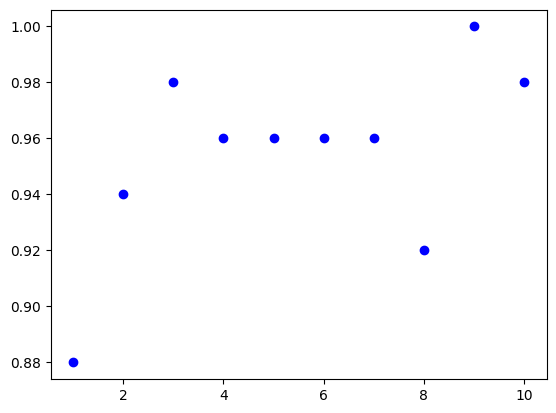

Sample with (width, height) (25.0, 32.0) classified as Pikachu
Sample with (width, height) (24.2, 31.5) classified as Pikachu
Sample with (width, height) (22.0, 34.0) classified as Pikachu
Sample with (width, height) (20.5, 34.0) classified as Pichu


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import random


print("###Pichu or Pikachu?###")
print("")
print("[1] Plot datapoints")
print("[2] Pichu or Pickahu?")
print("[3] Add datapoints")
print("")
print("What would you like to do?")
print("")


TRAIN_DATA, TEST_DATA = load_data("datapoints.txt", "testpoints.txt")


# error handling: negativa & non-numerical

while True:
    CHOICE = input("Pick number from 1-3")
    
    if not CHOICE.isdigit():
        break
    if int(CHOICE) == 1:
        graph(TRAIN_DATA)
    elif int(CHOICE) == 2:
        classifying(TRAIN_DATA, TEST_DATA[0], TEST_DATA[1])
    elif int(CHOICE) == 3:
        add_test_points()
    elif int(CHOICE) == 4:
            test_accuracy() 




In [ ]:
 s